# Discovering Exoplanets Around Distant Stars

By [Erin Hayes](https://www.ast.cam.ac.uk/people/Erin.Hayes), [Erik Rosenberg](https://www.ast.cam.ac.uk/people/erik.rosenberg), and [Steve Young](https://www.ast.cam.ac.uk/people/Steven.Young)

(INFORMATION ON EXOPLANETS) - STEVE

In this notebook, you will learn how astronomers use data from NASA's Kepler Space Telescope to discover over 5,000 exoplanets orbiting around other stars in our galaxy, the Milky Way.

## How to use this notebook:

Much like the notebooks you take to school, this notebook is a way to organize what you're learning all in one place. It consists of many "cells" which like the pages of your notebook. Each cell can contain one or many ideas. You can see the first cell of our notebook below this text. Try clicking on the cell and reading the text:

In [ ]:
# This is a cell!
# It is where we keep all of our ideas about the project we are working on!

In order to "run" a cell – which is like telling the computer to "read" a page of the notebook – you should press Shift + Enter together on your keyboard. Click on the cell below and try running it!

In [ ]:
# Do you know what 12*7 is equal to? Let's ask the computer!
# Press Shift + Enter to 

print('12 * 7 = ')
12*7

12 * 7 = 


84

Built-in to the computer are a number of "functions." Functions are short commands that make the computer automatically perform a task for us. These tasks can be really helpful.

We actually already used a function in the above cell. When we told the computer to print the text "12 * 7 = " that was a function! Functions are normally used by typing the name of the function followed by a set of parenthesis, which specify the item we want the function to focus on. For example, the code `print('Hello World!')` tells the computer to show the phrase "Hello World" on your screen!

Let's use the "min" function to find the minimum of a list of numbers. First, we'll want to create a list of numbers. Then we'll want to tell the computer to use min to find the minimum of our list of numbers.

In [ ]:
# Create a list of numbers below. Feel free to change it!
numbers = [0.3, 1, 28, 17.6, 4, 0.05, 1.25]

# Use the min function below to find the minimum of our list, "numbers"
print('The minimum of our list of numbers is: ')
min(numbers)

The minimum of our list of numbers is: 


0.05

Great! Now that we can run our cells and use functions, we can have the computer perform lots of math, make graphs for us, and more! Let's use the power of the computer to learn more about exoplanets below.

Before we start, run the below cell to setup the computer with the necessary tools to work through this notebook.

In [ ]:
!git clone https://github.com/erinhay/outreach.git
!pip install ipympl
!pip install astropy
!pip install lightkurve > /dev/null 2>&1 

import os
os.chdir('/content/outreach/IWD/py')
from helpers import *
import lightkurve as lk

from google.colab import output
output.enable_custom_widget_manager()
%matplotlib widget

os.chdir('/content/outreach/IWD/')
plt.style.use('./style/style.mplstyle')

## What is a light curve?

Light curves measure the brightness of a star over time, in a graph like this:

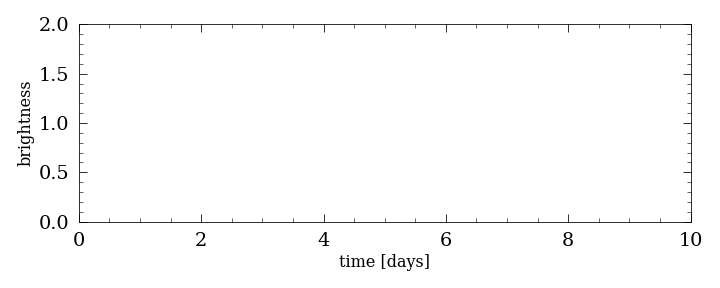

In [ ]:
plt.figure(figsize=(10,4)) #this line tells the computer we want to make a "figure" or graph
plt.xlabel('time [days]')  #this line makes an x-axis label with the text "time [days]"
plt.ylabel('brightness')   #this line makes an y-axis label with the text "brightness"
plt.xlim(0, 10)            #this line makes the x-axis go from 0 to 10 days
plt.ylim(0, 2)             #this line makes the y-axis go from 0 to 2 units of brightness
plt.tight_layout()
plt.show()

### The Kepler telescope was sent into space to observe the light curves of millions of stars. Most stars stay the same brightness for very long periods of time (millions of years!), so light curves often look very flat over time.

Run the cell below to see what a light curve of a "normal" star might look like!

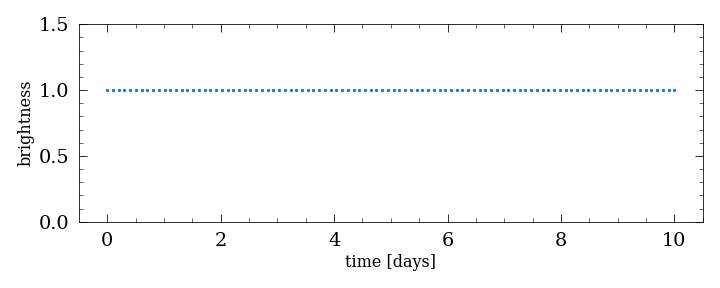

In [ ]:
plt.figure(figsize=(10,4))

# How many times do you want to observe the star? Let's start with 100.
N_observations = 100

# Next we're going to make a list that is N_observations entries long and goes from 0 to 10 days 
times = np.linspace(0, 10, N_observations)

# Now we are going to use a very special function called "model"
# This function tells us the brightness of a star if its told the times at which to get its brightness
# To store the brightness values, we have to give them a name! Let's set brightness = model(times).

brightness = model(times)

# Use the function plt.scatter to plot the brightnesses as a scatter plot!

plt.scatter(times, brightness, s=5) #s=5 makes the points smaller

plt.xlabel('time [days]')
plt.ylabel('brightness')
plt.ylim(0,1.5)
plt.tight_layout()

### However, when an exoplanet passes in front of the star, the brightness of the star decreases because the exoplanet blocks the light! The light curve is left with a dip in it like you see in this video:

<br>
<img src="https://github.com/erinhay/outreach/blob/main/IWD/images/transit_gif.gif?raw=1" alt="Alternative text" />
<br>

By observing stars and looking for dips in their brightnesses, astronomers can identify which stars have exoplanets orbiting around them. Let's use our model function to plot our own light curve with exoplanet transits!

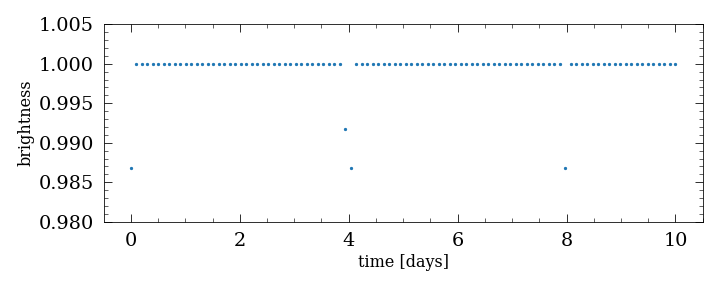

In [ ]:
# Set up the graph and the times in the same way as before:
plt.figure(figsize=(10,4))

N_observations = 100
times = np.linspace(0, 10, N_observations)

# Now, the model function needs to know how big the exoplanet is (its radius) and
# how many days it takes for the exoplanet to revolve around it's host star one time (its period).

exoplanet_radius = 80_000      #the radius of the exoplanet in km
period_of_orbit = 4            #the period of the exoplanet's orbit in days
            
    
# Tell the model function that we want the brightness of a star that has
# an exoplanet with radius, R_p, = exoplanet_radius and period, period, = period_of_orbit.
brightness = model(times, period = period_of_orbit, R_p = exoplanet_radius)


# Make a scatter plot of the brightnesses over time
plt.scatter(times, brightness, s=5)

plt.xlabel('time [days]')
plt.ylabel('brightness')
plt.ylim(0.98,1.005)
plt.tight_layout()

Wow! We can see the exoplanet orbit every three days!

### The shape of the transit can very a lot depending on a lot of factors, including the radius of the exoplanet and how fast the exoplanet moves around the star. There are a lot of other factors that affect the shape of the light curve, such as the size of the star and the distance of the exoplanet from the star.

<br>
<img src="https://github.com/erinhay/outreach/blob/main/IWD/images/orbit_gif.gif?raw=1" alt="Alternative text" />
<br>

In the next cell, you will be able to adjust the radius of the exoplanet, the period of the orbit, the distance of the exoplanet from the host star, and the radius of the host star using sliders. You are also able to change where the transits fall in time using the "offset" slider. Play with the sliders to create unique transit events and answer the following questions:

1. What happens to the size of the transit dip if you make the radius of the exoplanet smaller?
2. What happens to the light curve if you make the period of the orbit larger?
3. If the exoplanet is placed further away from the star, what happens to the shape of the transit?

Can you come up with reasons for why the light curve changes as a result of these changing characteristics of the exoplanet system?

interactive(children=(IntSlider(value=50000, description='exoplanet_radius', max=100000, step=1000), FloatSlid…

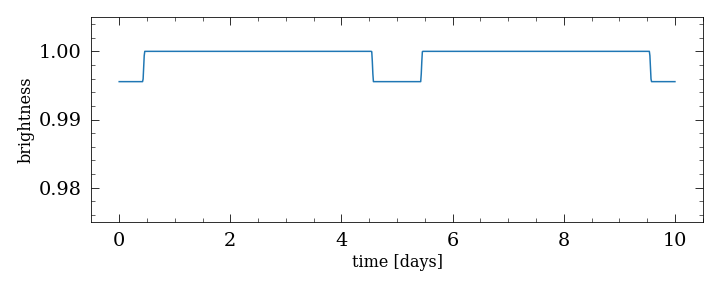

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))

N_observations = 1000
times = np.linspace(0, 10, N_observations)

@interact(exoplanet_radius = (0, 100_000, 1_000), period_of_orbit = (1, 10, 0.1),
          orbital_radius = (1e6, 9e6, 100_000), star_radius = (500_000, 1_000_000, 10_000), offset = (0, 10, 0.1))

def plot(exoplanet_radius, period_of_orbit, orbital_radius, star_radius, offset):
    brightness_model = model(times, period = period_of_orbit, R_p = exoplanet_radius,
                             a = orbital_radius, R_star = star_radius, offset = offset)
    ax.clear()
    ax.plot(times, brightness_model)
    ax.set_ylim(0.975, 1.005)
    ax.set_xlabel('time [days]')
    ax.set_ylabel('brightness')
    
plt.tight_layout()

Double click on this cell to edit it! You can write notes about what you observe about the changing shape of the transit here:

1. 
2. 
3. 

### We can plot our light curve on top of data and adjust the different aspects of the light curve to figure out the size of the exoplanet, its distance from the star, and more!

Below, you will find some data plotted on top of the light curve we saw above. Using the sliders, can you figure out the period of the exoplanet's orbit and the exoplanet's radius?

You might notice that the data looks pretty messy – the points don't all fall perfectly on the light curve underneath it. When data is imperfect, astronomers call it "noisy." Data may be noisy for a number of reasons. The common reason is that when astronomers measure brightnesses of stars from a photo from a telescope, sometimes light from brighter stars gets in the way of the star we are actually trying to measure. Then, the star appears brighter than it actually is. To stop this from happening, astronomers can measure a smaller area around the star, but sometimes that means astronomers miss some of the light that is actually coming from the star. A combination of these and other effects causes the data to be noisy.

interactive(children=(IntSlider(value=25000, description='exoplanet_radius', max=40000, min=10000, step=1000),…

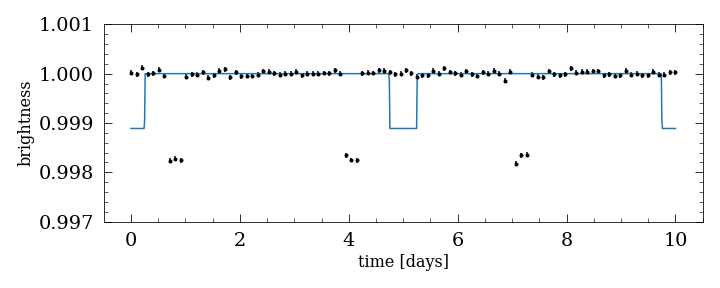

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))

N_observations = 1000
times = np.linspace(0, 10, N_observations)

example_times, example_brightness, example_error = np.loadtxt("./data/sample_transit_data.txt", unpack=True)

@interact(exoplanet_radius = (10_000, 40_000, 1_000), period_of_orbit = (1, 10, 0.1),
          orbital_radius = (1e7, 2e7, 100_000), star_radius = (500_000, 1_000_000, 10_000), offset = (0, 10, 0.1))

def plot(exoplanet_radius, period_of_orbit, orbital_radius, star_radius, offset):
    brightness_model = model(times, period = period_of_orbit, R_p = exoplanet_radius,
                             a = orbital_radius, R_star = star_radius, offset = offset)
    ax.clear()
    ax.errorbar(example_times, example_brightness, yerr=example_error, ls='None', marker='.', color='black')
    ax.plot(times, brightness_model)
    ax.set_ylim(0.997, 1.001)
    ax.set_xlabel('time [days]')
    ax.set_ylabel('brightness')
    
plt.tight_layout()

## Detecting Exoplanet Transits

Now that we know what to look for, we can look at **real** data from the Kepler telescope!

*Kepler* was a NASA space telescope designed to detect exoplanets orbiting other stars using the transit method described above. Before *Kepler*, scientists didn't know if Earth-like rocky planets were common or rare in the galaxy, or if most stars hosted planets at all. The overall aim of the mission was therefore to discover hundreds of new rocky planets, and more generally better understand the prevalence of different types of planets in our galaxy.
Specific mission goals included determining the percentage of terrestrial planets in the habital zone of different types of stars, characterizing their sizes, shapes, and orbits, and understanding the properties of stars hosting planetary systems.

*Kepler* launched in 2009. The primary mission consisted of continuous observation of a single field of about 160,000 stars. This allowed for well-measured, low-noise lightcurves so that small rocky planets could be detected despite the small dips they create. 
After four years of observation, two of *Kepler*'s reaction wheels (that accurately pointed the spacecraft) failed by 2013. NASA scientists designed a new mission dubbed K2 to continue to do science despite these limitations. K2 continued until *Kepler*'s retirement in 2018, observing additional planets as well as discovering 61 supernovae (stellar explosions).

Over its lifetime, *Kepler* observed over 500,000 stars and discovered nearly 3,000 confirmed exoplanets -- many more than the approximately 300 that were known before *Kepler*. This confirmed that planets are in fact common, with more planets than stars in our galaxy, and Earth-size worlds in particular are likely to orbit up to half the stars we see. After its retirement, *Kepler* has been succeeded by another NASA mission called TESS. Launched in 2018, TESS also uses transits to search for planets; it takes a complementary approach to *Kepler*, hunting for nearby exoplanets around brighter stars across the whole sky, and is currently in its extended mission.

<br>
<img src="https://github.com/erinhay/outreach/blob/main/IWD/images/kepler.jpeg?raw=1" alt="Alternative text" />
<br>

These experiments are made possible by large teams of scientists and engineers working in concert, including outstanding contributions by many women. This includes Kepler/K2 project scientists [Natalie Batalha](https://www.nasa.gov/mission_pages/kepler/team/batalha.html) and [Jessie Dotson](https://www.nasa.gov/mission_pages/kepler/team/jessie_dotson) and TESS project scientist [Patricia Boyd](https://science.gsfc.nasa.gov/sed/bio/patricia.t.boyd), who have/had lead science roles in these projects, as well as leading operations work by Kepler Mission Director/Operations Manager [Marcie Smith](https://www.nasa.gov/mission_pages/kepler/team/Marcie_Smith.html), and Project Manager [Maura Fujieh](https://www.nasa.gov/mission_pages/kepler/team/maura-fujieh).

-----

To look at *Kepler* data, astronomers have developed special tools. We're going to use some of those tools now to look at the light curve from a star called Kepler 1658. Let's see if we can find an exoplanet around this star!

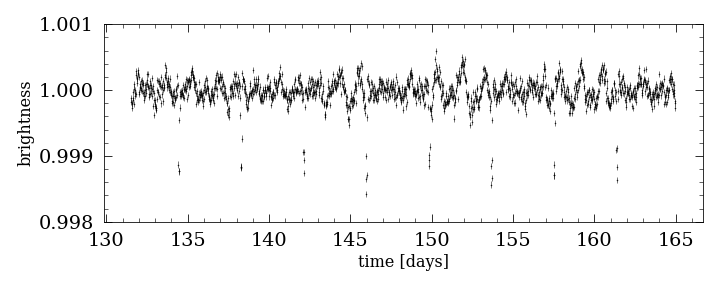

In [ ]:
# First, we need to retrieve light curve data for Kepler-1658b
## This requires a couple of steps using special functions:
## 1. Download the file
Kepler1658_file = lk.search_targetpixelfile("Kepler-1658")[1].download()

## 2. Extract the time and brightness data and put it into a table called "light_curve_data"
light_curve_data = Kepler1658_file.to_lightcurve(method="pld").remove_outliers().flatten()
light_curve_data.meta['R_p'] = 1.07*69_911*u.km

## 3. Get the time and brightness data from the light_curve_data table
Kepler_times = light_curve_data['time'].value        #time data
Kepler_brightness = light_curve_data['flux'].value   #brightness data
Kepler_error = light_curve_data['flux_err'].value

# Now, let's plot the data to see what it looks like!

fig, ax = plt.subplots(figsize=(10,4))
ax.errorbar(Kepler_times, Kepler_brightness, yerr=Kepler_error, ls='None', marker='.', color='black', ms=1, lw=0.5)
ax.set_ylim(0.998, 1.001)
ax.set_xlabel('time [days]')
ax.set_ylabel('brightness')

plt.tight_layout()

### Wow! Based on this light curve, do you think there's an exoplanet orbiting around this star? 

Let's zoom into a smaller region of the light curve to get a better look at it.

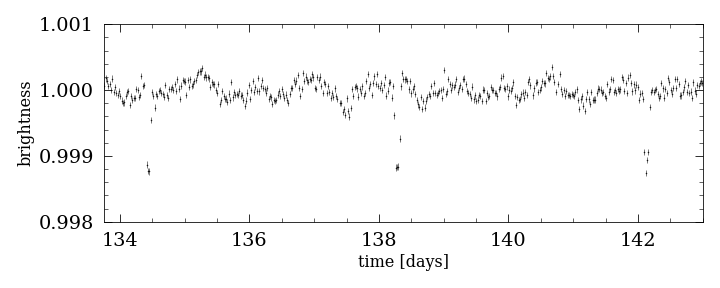

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.errorbar(Kepler_times, Kepler_brightness, yerr=Kepler_error, ls='None', marker='.', color='black', ms=1, lw=0.5)
ax.set_xlim(133.75, 143)
ax.set_ylim(0.998, 1.001)
ax.set_xlabel('time [days]')
ax.set_ylabel('brightness')

plt.tight_layout()

### It's an exoplanet!

Let's use the sliders from before to see if we can determine the period and radius of Kepler 1685's exoplanet. We know that this star is about 3x the size of the sun, so we won't worry about adjusting that value.

interactive(children=(IntSlider(value=62000, description='exoplanet_radius', max=75000, min=50000, step=1000),…

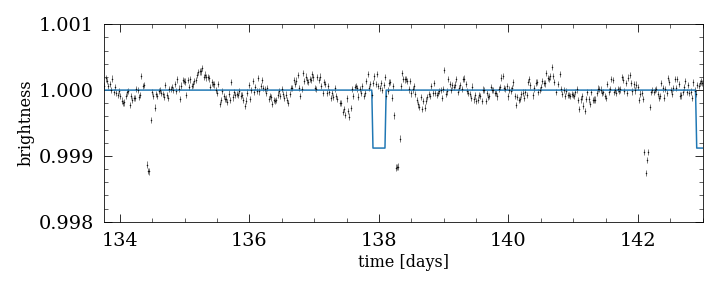

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))

N_observations = 1000
times = np.linspace(133.75, 143, N_observations)

@interact(exoplanet_radius = (50_000, 75_000, 1_000), period_of_orbit = (0, 10, 0.1),
          orbital_radius = (1e7, 5e8, 100_000), offset = (0, 5, 0.05))

def plot(exoplanet_radius, period_of_orbit, orbital_radius, offset):
    brightness_model = model(times, period = period_of_orbit, R_p = exoplanet_radius,
                             a = orbital_radius, R_star = 3*696_340, offset = offset)
    ax.clear()
    ax.errorbar(Kepler_times, Kepler_brightness, yerr=Kepler_error, ls='None', marker='.', color='black', ms=1, lw=0.5)
    ax.plot(times, brightness_model)
    ax.set_xlim(133.75, 143)
    ax.set_ylim(0.998, 1.001)
    ax.set_xlabel('time [days]')
    ax.set_ylabel('brightness')
    
plt.tight_layout()

### Was that difficult to figure out? I bet! It's nearly impossible to get the right answer on your own!

Because there are a lot of different things affecting the shape of the light curve, astronomers had to come up with easier ways to find the exoplanet characteristics from the light curve. We had to do some complicated maths and coding to get the answers, but fortunately we can now use the findings by running the following cells to find out the solutions!

In [ ]:
# Extract the period of the light curve:
true_period = light_curve_data.to_periodogram("bls").period_at_max_power

# Stack each orbit on top of each other:
folded_light_curve_data = light_curve_data.fold(2*true_period)

time_data = folded_light_curve_data.time.value
brightness_data = folded_light_curve_data.flux.value
time_data = time_data - np.min(time_data)

print('The period of the light curve is: ')
true_period

The period of the light curve is: 


<Quantity 3.84945044 d>

In [ ]:
true_radius = light_curve_data.meta['R_p']

print('The radius of the exoplanet is: ')
true_radius

The radius of the exoplanet is: 


<Quantity 74804.77 km>

### Let's plot the solution on top of one transit to see if it looks right!

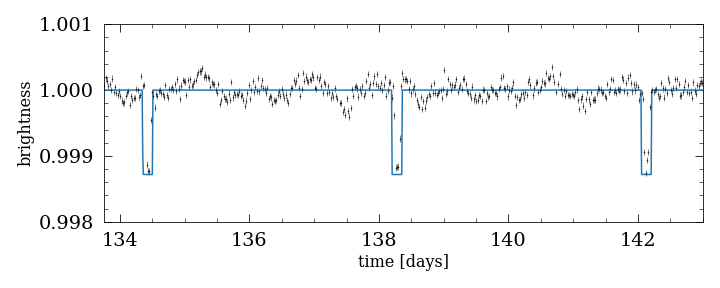

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))

N_observations = 1000
times = np.linspace(133.75, 143, N_observations)

brightness_model = model(times, period = true_period.value, R_p = true_radius.value,
                         a = 2.55e8, R_star = 3*696_340, offset = 8)

ax.errorbar(Kepler_times, Kepler_brightness, yerr=Kepler_error, ls='None', marker='.', color='black', ms=1, lw=0.5)
ax.plot(times, brightness_model)
ax.set_xlim(133.75, 143)
ax.set_ylim(0.998, 1.001)
ax.set_xlabel('time [days]')
ax.set_ylabel('brightness')
    
plt.tight_layout()

### Looks great! Of course, the fit won't be perfect because of the noise we talked about before causing variations in the brightness of the star. You should be so proud of yourself for discovering an exoplanet!

The exoplanet Kepler 1658-b was first discovered in 2019 by a team of astronomers led by Ashley Chontos, a researcher at Princeton University in the USA. Maybe you'll be the first one to discover an exoplanet one day too!



## Types of Exoplanets

Not all planets look alike! Depending on factors like the radius of the exoplanet and how fast it is moving around its host star (aka its period), planets can have very different properties.

Think about our own solar system:

<br>
<img src="https://github.com/erinhay/outreach/blob/main/IWD/images/solar_system.png?raw=1" alt="Alternative text"/>
<br>

Mercury, Venus, Earth, and Mars are relatively small rocky planets. Jupiter, Saturn, Neptune, and Uranus are much larger, cool gaseous planets. 

Just like there are different types of planets in our solar system, there are lots of different types of exoplanets. These types can be divided up by their radius and their period, as you can see in the graph below. For example, an exoplanet with a very large radius, more than 8-10x the radius of the Earth, and a very short period, less than 10 days, is called a "Hot Jupiter." This name comes from the fact that the planets are as big as Jupiter, but are much closer to the host star, which makes them much hotter than Jupiter.

Using the graph below, what are the other types of exoplanets? What do you think their names, sizes, and periods say about the characteristics of the exoplanets?

<br>
<img src="https://github.com/erinhay/outreach/blob/main/IWD/images/types_of_exoplanets.jpeg?raw=1" alt="Alternative text"/>
<br>

Can you find which class of planets Jupiter belongs to? It is about 11x the size of Earth and has a period of about 4,000 days!

Because of their different radii and periods, the different types of exoplanets have different looking light curves. Run the cell below to see the differences in the shape of the light curve dip depending on the type of exoplanet!

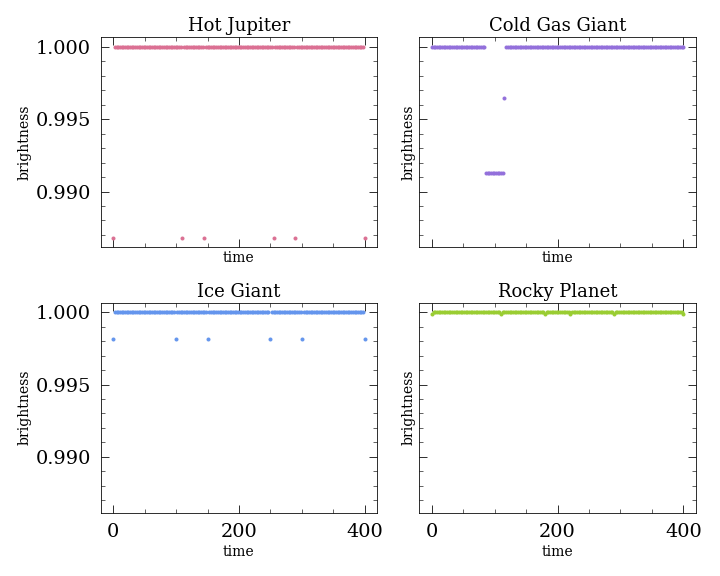

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (10,8), sharex=True, sharey=True)

titles = [['Hot Jupiter', 'Cold Gas Giant'], ['Ice Giant', 'Rocky Planet']]
colors = [['palevioletred', 'mediumpurple'], ['cornflowerblue', 'yellowgreen']]
exoplanet_radii = [[80_000, 65_000], [30_000, 8_000]]
periods_of_orbit = [[5, 1000], [50, 10]]
offset = [[0, -100], [0, 0]]

N_observations = 150
times = np.linspace(0, 400, N_observations)

for i, title_pair in enumerate(titles):
    for j, title in enumerate(title_pair):
        
        brightness = model(times, period = periods_of_orbit[i][j], R_p = exoplanet_radii[i][j], offset=offset[i][j])
        
        ax[i,j].errorbar(times, brightness, ls='None', marker='.', color=colors[i][j])
        ax[i,j].set_xlabel('time', fontsize=14)
        ax[i,j].set_ylabel('brightness', fontsize=14)
        ax[i,j].set_title(title, fontsize=18)
        
plt.tight_layout()

What do you notice about the above light curves? Is there anything that two or more of the light curves have in common? Is there anythink unique about one of the light curves? Which types of exoplanets do you think would be the easiest to detect? Which do you think would be the hardest to detect?

# Thank you for exploring the world of exoplanets with us today!

If you have any last questions, feel free to ask any helper in a purple shirt!

## Sources
* https://www.nytimes.com/2018/10/30/science/nasa-kepler-exoplanet.html
* https://www.nasa.gov/mission_pages/kepler/team/index.html
* https://www.nasa.gov/mission_pages/kepler/overview/index.html
* https://www.nasa.gov/kepler/topscience
* https://science.gsfc.nasa.gov/sed/bio/patricia.t.boyd
* https://www.nasa.gov/mission_pages/kepler/team/batalha.html
* https://www.nytimes.com/2018/03/26/science/tess-nasa-exoplanets.html
* https://www.nasa.gov/content/about-tess

## NYT Interactive graphic of Kepler planets:
https://archive.nytimes.com/www.nytimes.com/interactive/science/space/keplers-tally-of-planets.html